---
title: Fetch org units from DHIS2 Web API
short_title: Fetch from Web API
---

This page shows practical ways to fetch organisation unit geojson from the DHIS2 Web API using `dhis2-python-client` library.

In the **climate-tools** environment, `dhis2-python-client` library is already installed. You only need to come up with your DHIS2 credentials and server address to use this library. Below is a basic usage:

In [1]:
from dhis2_client import DHIS2Client
from dhis2_client.settings import ClientSettings

# Client configuration
cfg = ClientSettings(
  base_url="https://play.im.dhis2.org/stable-2-42-3-1",
  username="admin",
  password="district")

client = DHIS2Client(settings=cfg)
info = client.get_system_info()

# Check if everything is working.
# You should see your current DHIS2 version info.
print("▶ Current DHIS2 version:", info["version"])

▶ Current DHIS2 version: 2.42.3.1


Once you are sure to be able to make connection with your DHIS2 instance, you can proceed to fetching GeoJSON info. But first you need to decide which org unit(s) or level you want to fetch. Below is an example for fetching GeoJSON info for all level 2 org units:

In [13]:
# Get org units GeoJSON from DHIS2
level = 2
org_units_geojson = client.get_org_units_geojson(level=level)

To load this GeoJSON with geopandas, the easiest way currently is to convert the GeoJSON dictionary to a string, and then loading that string into geopandas:

In [15]:
# Convert GeoJSON to geopandas
import geopandas as gpd
import json
gdf = gpd.read_file(json.dumps(org_units_geojson))

# Show the contents of the loaded org units
gdf

Skipping field groups: unsupported OGR type: 5


,id,code,name,level,parent,parentGraph,geometry
0,O6uvpzGd5pu,OU_264,Bo,2,ImspTQPwCqd,ImspTQPwCqd,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,fdc6uOvgoji,OU_193190,Bombali,2,ImspTQPwCqd,ImspTQPwCqd,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,lc3eMKXaEfw,OU_197385,Bonthe,2,ImspTQPwCqd,ImspTQPwCqd,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,jUb8gELQApl,OU_204856,Kailahun,2,ImspTQPwCqd,ImspTQPwCqd,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,PMa2VCrupOd,OU_211212,Kambia,2,ImspTQPwCqd,ImspTQPwCqd,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."
5,kJq2mPyFEHo,OU_222616,Kenema,2,ImspTQPwCqd,ImspTQPwCqd,"POLYGON ((-11.3596 8.5317, -11.3513 8.5234, -1..."
6,qhqAxPSTUXp,OU_226213,Koinadugu,2,ImspTQPwCqd,ImspTQPwCqd,"POLYGON ((-10.585 9.0434, -10.5877 9.0432, -10..."
7,Vth0fbpFcsO,OU_233310,Kono,2,ImspTQPwCqd,ImspTQPwCqd,"POLYGON ((-10.585 9.0434, -10.5848 9.0432, -10..."
8,jmIPBj66vD6,OU_246990,Moyamba,2,ImspTQPwCqd,ImspTQPwCqd,"MULTIPOLYGON (((-12.6351 7.6613, -12.6346 7.66..."
9,TEQlaapDQoK,OU_254945,Port Loko,2,ImspTQPwCqd,ImspTQPwCqd,"MULTIPOLYGON (((-13.119 8.4718, -13.1174 8.470..."


<Axes: >

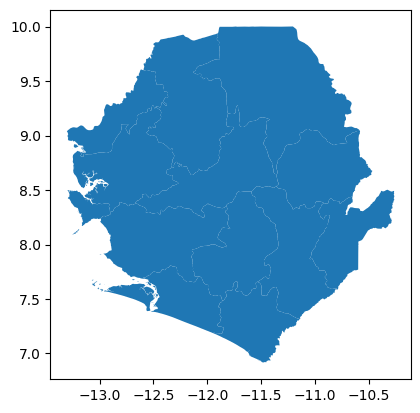

In [16]:
# Do a quick plot
gdf.plot()